# Исследование закономерностей определяющих успешность игры

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import missingno as msno

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Блок № 1. Загрузка данных </b> </div>

In [2]:
try:
    data = pd.read_csv('C:\Data yandex\games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
print(data.info())
print()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


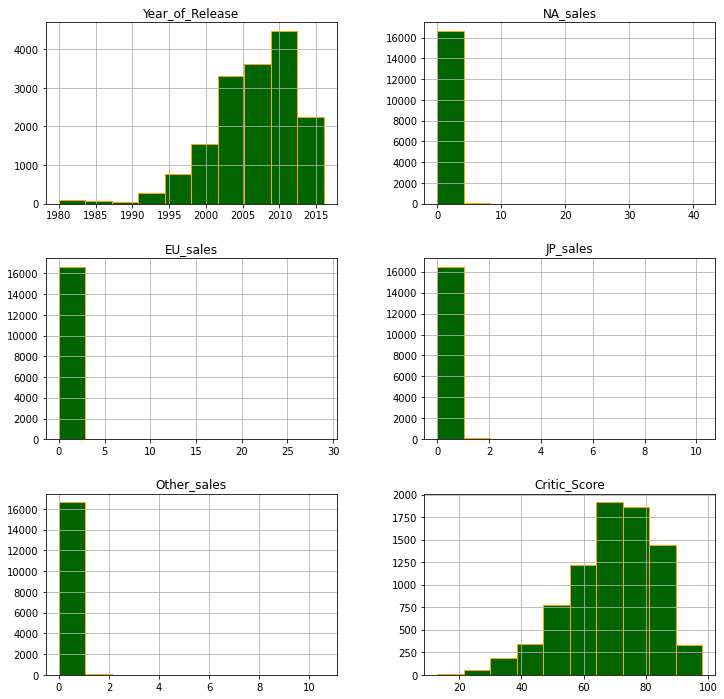

In [4]:
data.hist(figsize=(12, 12), color = 'darkgreen', edgecolor = 'orange')
plt.show()

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "><b>Вывод по блоку № 1. 'Загрузка данных' :</b>  

    
    В нашем распоряжении 1 таблица (data) на 16715 строк и 11 столбцов.
    
      Описание данных:
      Name — название игры
      Platform — платформа
      Year_of_Release — год выпуска
      Genre — жанр игры
      NA_sales — продажи в Северной Америке (миллионы проданных копий)
      EU_sales — продажи в Европе (миллионы проданных копий)
      JP_sales — продажи в Японии (миллионы проданных копий)
      Other_sales — продажи в других странах (миллионы проданных копий)
      Critic_Score — оценка критиков (максимум 100)
      User_Score — оценка пользователей (максимум 10)
      Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
      
    Данные за 2016 год могут быть неполными.

</div>

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Блок № 2. Предообработка данных </b> </div>

**Заменим названия столбцов (приведём к нижнему регистру).**

In [5]:
data.columns = data.columns.str.lower()
data.columns.unique() # проверим

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Преобразуем данные в нужные типы.**

Столбец **year_of_release** просто переводим в int (убираем десятые):

In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Столбец **critic_score** округляем, чтобы убрать лишние нули:

In [7]:
data['critic_score'] = data['critic_score'].astype('Int64')

Рассмотрим столбец **user_score** :

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных присутствует аббревиатура 'tbd', гугл подсказывает, что 'tbd' = To Be Determined (окончательное решение ещё не определенно) => значение 'tbd' необходимо заменить на 'nan' и переведём значения столбца из object в float :

In [9]:
data.loc[data['user_score'] == "tbd", 'user_score'] = np.nan 
data['user_score'] = data['user_score'].astype('float64')

Посмотрим столбец **rating** внимательнее:

In [10]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В данном столбце находятся оценки от ассоциации ESRB (Entertainment Software Rating Board) определяющие возрастной рейтинг компьютерных игр. Википедия подсказывает, что оценка 'K-A' устаревшая, сейчас 'K-A' = 'E', заменим эти значения:

In [11]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
#data['rating'].unique()

Проверяем, что получилось:

In [12]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


**Посмотрим пропуски.**

<AxesSubplot:>

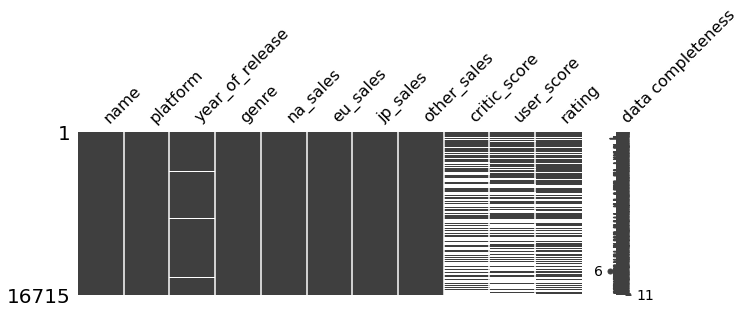

In [13]:
msno.matrix(data, labels=True, figsize=(10, 3))

<AxesSubplot:>

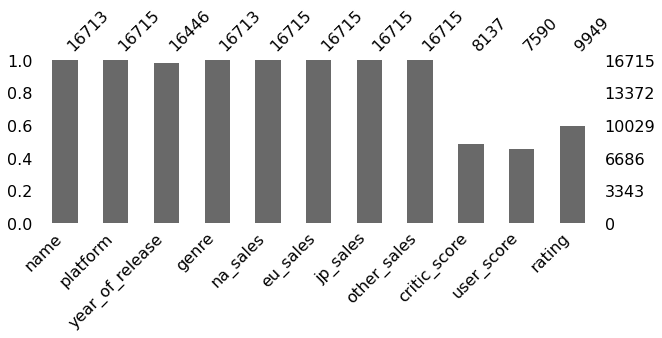

In [14]:
msno.bar(data, figsize=(10, 3))

<AxesSubplot:>

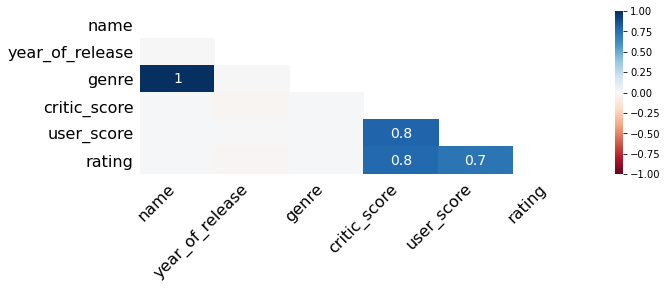

In [15]:
msno.heatmap(data, figsize=(10, 3))

Видим, что корреляция между 'name' и 'genre' равна 1 => в этих строках пропущенно и название игры и жанра. Таких строк всего 2, нам они не нужны, удаляем:

In [16]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [17]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


В 2 строках пропуски и в столбце 'name' и в 'genre', удаляем:

In [18]:
data = data.dropna(subset=['name']).reset_index(drop=True)

Пропусков в столбце year_of_release не много, заполнить не получится, поэтому так же удаляем:

In [19]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

Проверка

In [20]:
data.isna().sum() # проверяем пропуски

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Пропуски в столбцах **critic_score**, **user_score** и **rating** теоретически можно заменить на 0, но пока оставим как есть. Посмотрим, как повлияет на дальнейшее исследование.

In [21]:
data.duplicated().sum() # проверяем явные дубликаты

0

Посмотрим неявные дубликаты

In [22]:
data['platform'].unique() # проверяем неявные дубликаты

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [23]:
data['genre'].unique() # проверяем неявные дубликаты

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Всё в порядке.

**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [24]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "><b>Вывод по блоку № 2. 'Предобработка данных' :</b>           

    Были изменены названия столбцов (привели к нижнему регистру).
    В столбцах 'year_of_release' и 'critic_score' изменили тип данных на Int.
    В столбце 'rating' изменили значение 'tbd' на 'nan'.
    Удалены строки с пропусками в наименовании игры, жанре и без данных о годе выпуска.
    Посчитали суммарные продажи и добавили в отдельный столбец 'total_sales'.

    В столбце rating находятся возрастные рейтинги от ассоциации ESRB (Entertainment Software Rating Board), расшифровываются так (информация из википедии):  
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.  
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults"):  
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.  
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.  
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.  
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.  
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу:  
- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариан. </div>

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Блок № 3. Исследовательский анализ данных </b> </div>

**Посмотрим сколько игр выпускалось в разные годы.**

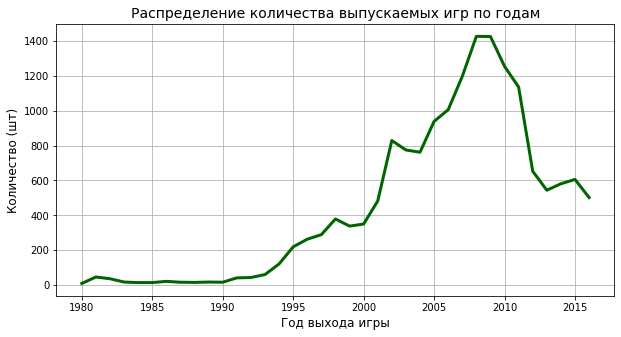

In [25]:
data_group_year = data.groupby('year_of_release')['name'].count()
data_group_year.plot(kind='line', figsize=(10, 5), color = 'darkgreen', lw=3)
plt.grid(True)
plt.xlabel('Год выхода игры', fontsize=12)
plt.ylabel('Количество (шт)', fontsize=12)
plt.title('Распределение количества выпускаемых игр по годам', fontsize=14)
plt.show()

Индустрия активно развивалась с 2000 года. После 2008 резкий спад, скорее всего связан с мировым кризисом. Люди стали меньше тратить на развлечения => инвесторы перестали вкладывать в разработку новых игр. Возможно, так же сказалось развитие мобильного гейминга (в 2007 вышел первый iphone, многие платформы типа 'psp' начали терять аудиторию).

**Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами (топ 10) и построим распределение по годам.**

In [26]:
data_platform_sales_sum = data.groupby('platform')['total_sales'].sum()
data_platform_sales_sum = data_platform_sales_sum.sort_values(ascending=False).reset_index()
data_platform_sales_sum = data_platform_sales_sum[0:10]
data_platform_sales_sum

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


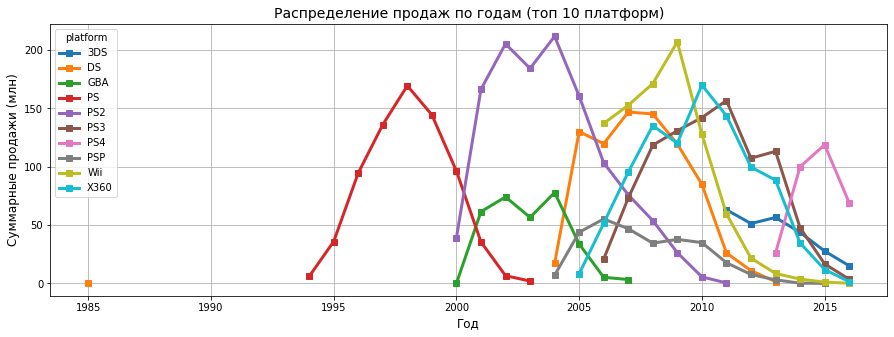

In [27]:
platform_top10_plot = data[data['platform'].isin(data_platform_sales_sum['platform'])].groupby(
    ['year_of_release', 'platform'])['total_sales'].sum().unstack()
platform_top10_plot.plot(kind='line', marker='s', grid=True, figsize=(15, 5), lw=3)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Суммарные продажи (млн)', fontsize=12)
plt.title('Распределение продаж по годам (топ 10 платформ)', fontsize=14)
plt.show()

Можно сделать вывод, что абсолютно все платформы долго не живут. Стремительно набирают популярность при релизе и так же стремительно начинают терять покупателей (в среднем) через 5 лет. Средняя продолжительность жизни платформы ~ 10 лет. В промежутке 2015 - 2016 год все платформы падают в продажах. Стабильной можно считать PS, которая выпускает новое поколение каждые ~7 лет.

**Возьмём данные за актуальный период (последние 5 лет (2012-2016)) и определим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.**

Для начала рассмотрим общие продажи за последние 5 лет (2012-2016)

In [28]:
platform_by_sales_5 = data.query('year_of_release >= 2012').groupby('platform').agg(
    {'year_of_release':'count', 'total_sales':'sum'})
platform_by_sales_5.columns = ['count', 'total_sales']
platform_by_sales_5 = platform_by_sales_5.sort_values(by='total_sales', ascending=False).reset_index()
platform_by_sales_5

,platform,count,total_sales
0,PS4,392,314.14
1,PS3,493,288.79
2,X360,292,236.54
3,3DS,396,194.61
4,XOne,247,159.32
5,WiiU,147,82.19
6,PC,250,62.65
7,PSV,411,49.18
8,Wii,54,35.37
9,DS,31,12.55


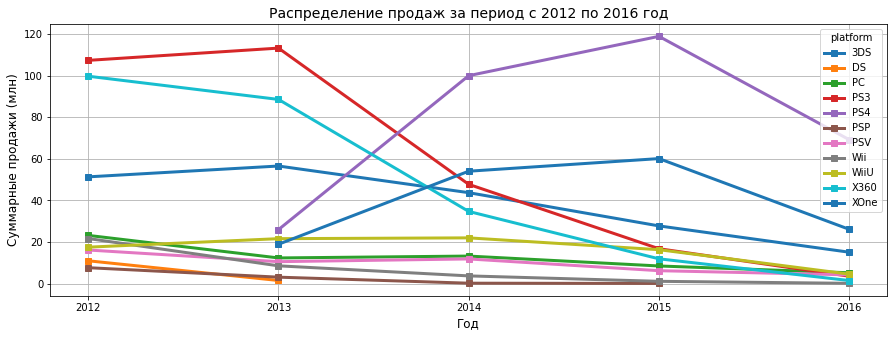

In [29]:
platform_5_year_plot = data.query('year_of_release >= 2012').groupby(
    ['year_of_release', 'platform'])['total_sales'].sum().unstack()
platform_5_year_plot.plot(kind='line', marker='s', grid=True, figsize=(15, 5), lw=3)
plt.xlabel('Год', fontsize=12)
plt.xticks(np.arange(2012, 2017, step=1))
plt.ylabel('Суммарные продажи (млн)', fontsize=12)
plt.title('Распределение продаж за период с 2012 по 2016 год', fontsize=14)
plt.show()

Все представленные платформы постепенно теряют в продажах. На общем фоне, потенциально прибыльными можно назвать: **XOne** и **PS4**. На конец 2016 года, самым правильным решением будет начинать готовиться к выходу 5го поколения **PS**. Так же, можно обратить внимание на **PC**, результаты по продажам не такие впечатляющие, но стабильные на протяжении многих лет. **Nintendo 3DS** стабильно скатывается, шансов получить положительную динамику - практически нет.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и опишем результат.**

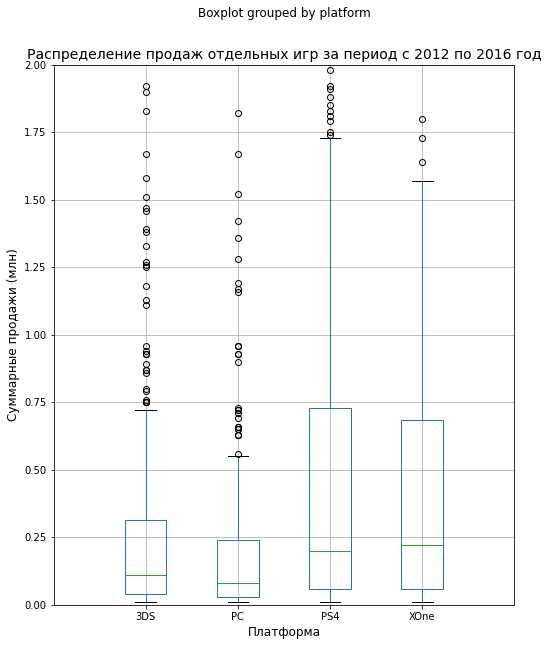

In [30]:
platform = ['PS4', 'XOne', '3DS', 'PC']
data_5_year = data.query('year_of_release >= 2012')
data_5_year.query('platform in @platform').boxplot(column='total_sales', by='platform', figsize=(8, 10))
plt.ylim(0, 2)
plt.xlim(0, 5)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Суммарные продажи (млн)', fontsize=12)
plt.title('Распределение продаж отдельных игр за период с 2012 по 2016 год', fontsize=14)
plt.show()

А если смотреть с этой стороны **PC** вообще не плох, отставание уже не кажется таким катастрофическим. **PS4** и **XOne** конечно чаще выстреливают кассовыми сборами и как следствие более прибыльные. Появилась ещё идея, возможно сказывается кол-во пиратства на **PC**, все кассовые игры доступны для этой платформы и распротранена она шире, интересно было бы посмотреть свежие данные.

**Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

Рассмотрим **PS4**

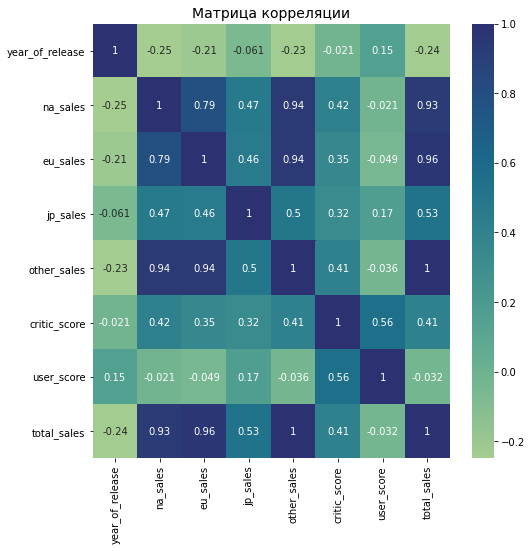

In [31]:
data_PS4 = data_5_year.query('platform == "PS4"')
corr_matrix = data_PS4.corr()
fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Матрица корреляции', fontsize=14)
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.show()

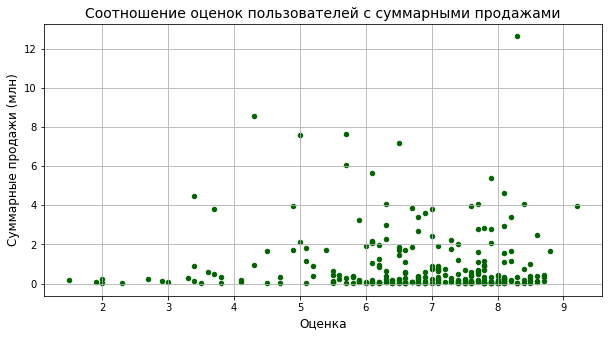

In [32]:
data_PS4.plot(kind='scatter', x='user_score', y='total_sales', color = 'darkgreen', figsize=(10, 5))
plt.grid(True)
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Суммарные продажи (млн)', fontsize=12)
plt.title('Соотношение оценок пользователей с суммарными продажами', fontsize=14)
plt.show()

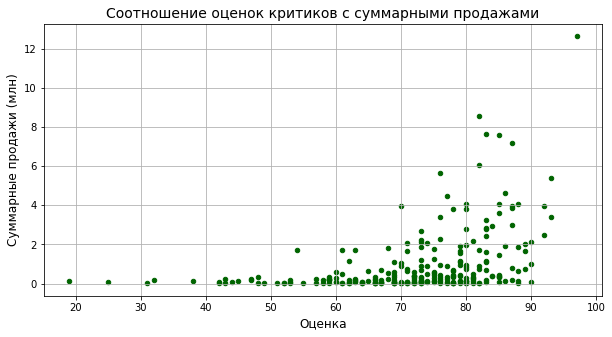

In [33]:
data_PS4.plot(kind='scatter', x='critic_score', y='total_sales', color = 'darkgreen', figsize=(10, 5))
plt.grid(True)
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Суммарные продажи (млн)', fontsize=12)
plt.title('Соотношение оценок критиков с суммарными продажами', fontsize=14)
plt.show()

**Вывод по PS4:** Из матрицы видно, что оценки критиков cлабо влияют на продажи (корреляция 0.41), оценки же пользователей не оказывают влияние (корреляция -0.032).

**Соотнесём выводы с продажами игр на других платформах.**

Рассмотрим **XOne**

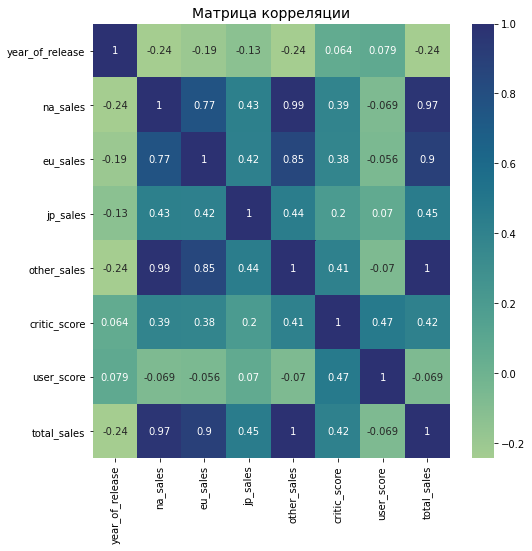

In [34]:
data_XOne = data_5_year.query('platform == "XOne"')
corr_matrix = data_XOne.corr()
fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Матрица корреляции', fontsize=14)
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.show()

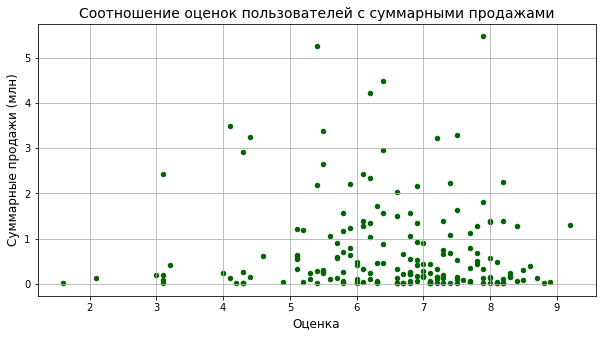

In [35]:
data_XOne.plot(kind='scatter', x='user_score', y='total_sales', color = 'darkgreen', figsize=(10, 5))
plt.grid(True)
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Суммарные продажи (млн)', fontsize=12)
plt.title('Соотношение оценок пользователей с суммарными продажами', fontsize=14)
plt.show()

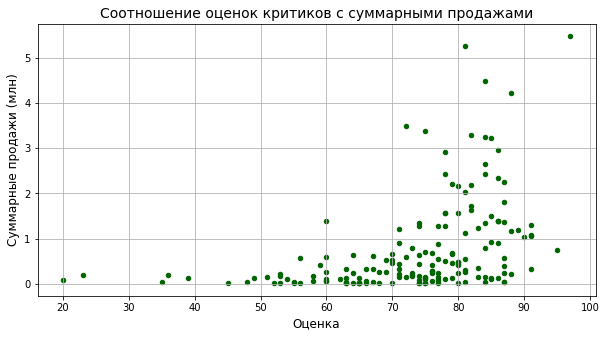

In [36]:
data_XOne.plot(kind='scatter', x='critic_score', y='total_sales', color = 'darkgreen', figsize=(10, 5))
plt.grid(True)
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Суммарные продажи (млн)', fontsize=12)
plt.title('Соотношение оценок критиков с суммарными продажами', fontsize=14)
plt.show()

**Вывод по ХOne:** Картина похожая, как и у **PS4**, оценки критиков слабо влияют на продажи (корреляция 0.42), оценки же пользователей не оказывают влияние (корреляция -0.069).

Рассмотрим **PC**

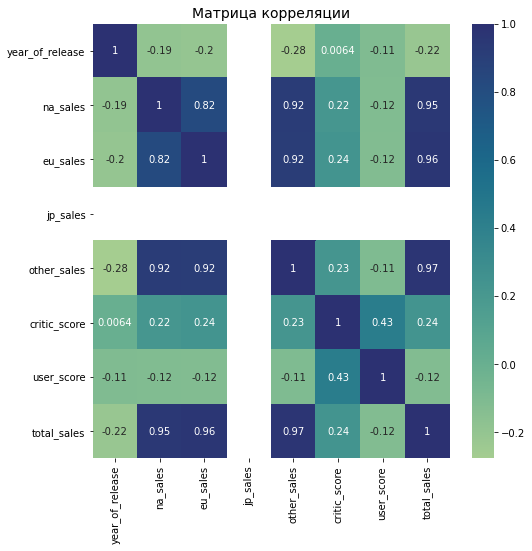

In [37]:
data_PC = data_5_year.query('platform == "PC"')
corr_matrix = data_PC.corr()
fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Матрица корреляции', fontsize=14)
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.show()

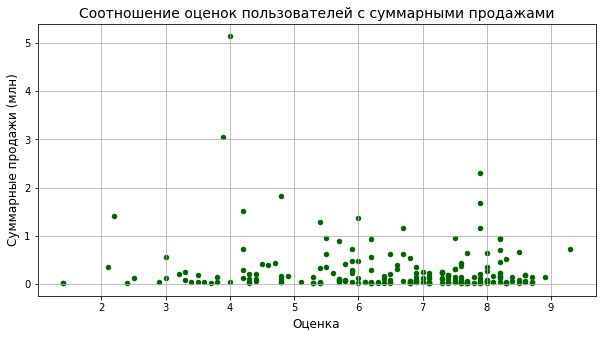

In [38]:
data_PC.plot(kind='scatter', x='user_score', y='total_sales', color = 'darkgreen', figsize=(10, 5))
plt.grid(True)
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Суммарные продажи (млн)', fontsize=12)
plt.title('Соотношение оценок пользователей с суммарными продажами', fontsize=14)
plt.show()

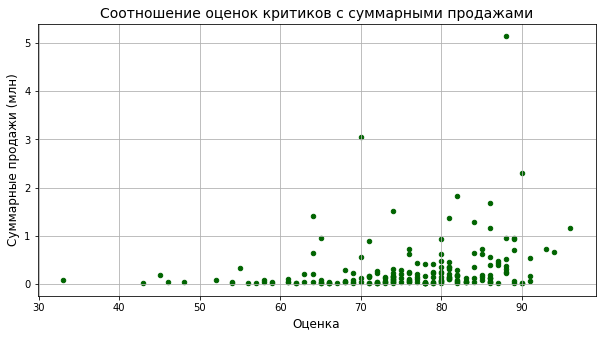

In [39]:
data_PC.plot(kind='scatter', x='critic_score', y='total_sales', color = 'darkgreen', figsize=(10, 5))
plt.grid(True)
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Суммарные продажи (млн)', fontsize=12)
plt.title('Соотношение оценок критиков с суммарными продажами', fontsize=14)
plt.show()

**Вывод по PC:** В случае с **PC** ситуация немного другая, на суммарные продажи практически не влияют ни оценки критиков (корреляция 0.24) ни оценки пользователей (корреляция -0.12).

Рассмотрим **3DS**

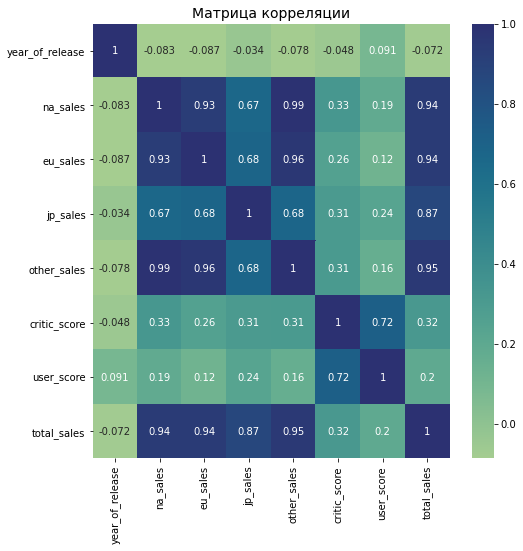

In [40]:
data_3DS = data_5_year.query('platform == "3DS"')
corr_matrix = data_3DS.corr()
fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Матрица корреляции', fontsize=14)
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.show()

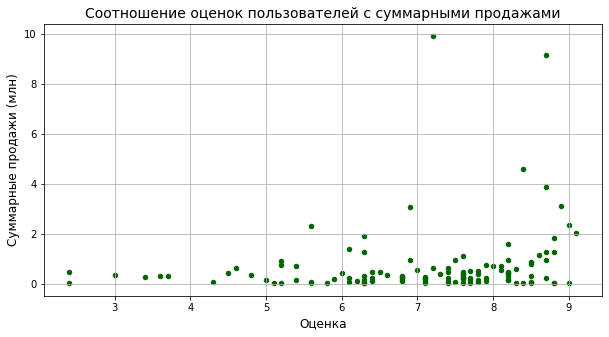

In [41]:
data_3DS.plot(kind='scatter', x='user_score', y='total_sales', color = 'darkgreen', figsize=(10, 5))
plt.grid(True)
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Суммарные продажи (млн)', fontsize=12)
plt.title('Соотношение оценок пользователей с суммарными продажами', fontsize=14)
plt.show()

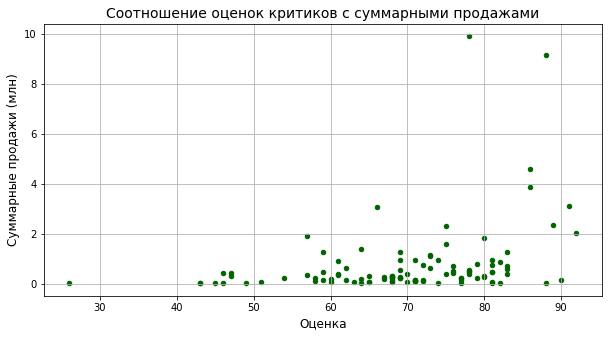

In [42]:
data_3DS.plot(kind='scatter', x='critic_score', y='total_sales', color = 'darkgreen', figsize=(10, 5))
plt.grid(True)
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Суммарные продажи (млн)', fontsize=12)
plt.title('Соотношение оценок критиков с суммарными продажами', fontsize=14)
plt.show()

**Вывод по 3DS:** На суммарные продажи практически не влияют ни оценки критиков (корреляция 0.32) ни оценки пользователей (корреляция 0.2). Интересно, что в Японии оценки пользователей, чаще совпадают с оценками критиков чем в Европе или Северной Америке.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

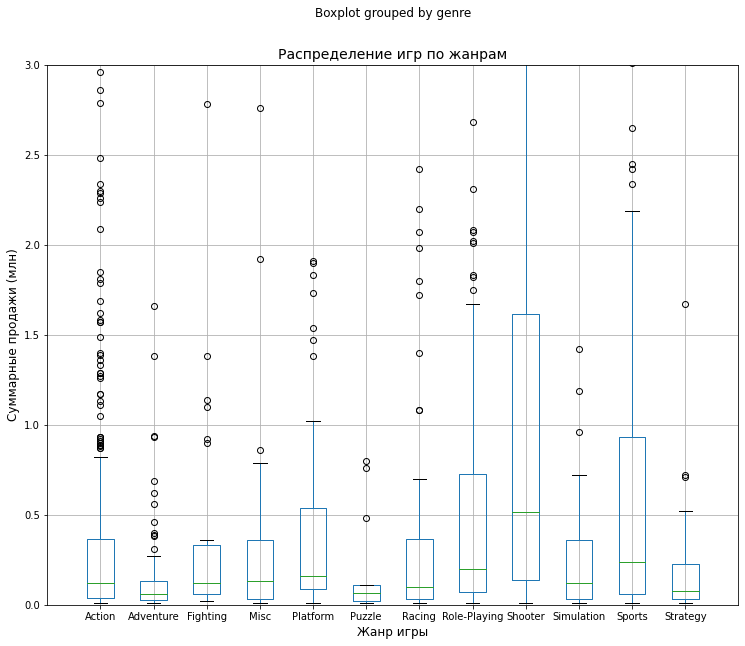

In [43]:
platform = ['PS4', 'XOne', '3DS', 'PC']
data_5_year.query('platform in @platform').boxplot(column='total_sales', by='genre', figsize=(12, 10))
plt.ylim(0, 3)
plt.xlim(0, 13)
plt.xlabel('Жанр игры', fontsize=12)
plt.ylabel('Суммарные продажи (млн)', fontsize=12)
plt.title('Распределение игр по жанрам', fontsize=14)
plt.show()

Стабильнее всего приносят деньги игры жанра Shooter, Sports и Role-Playing. Достаточно часто, выстреливают игры жанра Action. Такие жанры как Puzzle и Adventure отличаются стабильно низкими продажами.

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "><b>Вывод по блоку № 3. 'Исследовательский анализ данных' :</b> 

    Индустрия активно развивалась с 2000 года. После 2008 резкий спад, скорее всего связан с мировым кризисом. Люди стали меньше тратить на развлечения => инвесторы перестали вкладывать в разработку новых игр. Возможно, так же сказалось развитие мобильного гейминга (в 2007 вышел первый iphone, многие платформы типа 'psp' начали терять аудиторию).
    Абсолютно все платформы долго не живут. Стремительно набирают популярность при релизе и так же стремительно начинают терять покупателей (в среднем) через 5 лет. Средняя продолжительность жизни платформы ~ 10 лет. В промежутке 2015 - 2016 год все платформы падают в продажах. Стабильными можно считать платформы от Sony и Microsoft, которые выпускают новое поколение каждые ~7 лет.
    На общем фоне, потенциально прибыльными можно назвать: XOne и PS4. На конец 2016 года, самым правильным решением будет начинать готовиться к выходу 5го поколения PS.  Nintendo 3DS стабильно скатывается, шансов получить положительную динамику - практически нет.
    Так же, можно обратить внимание на PC, результаты по продажам не такие впечатляющие, но стабильные на протяжении многих лет. PS4 и XOne конечно чаще выстреливают кассовыми сборами и как следствие более прибыльные. Возможно сказывается кол-во пиратства на PC, все кассовые игры доступны для этой платформы и распротранена она шире.
    Вывод по PS4: Из матрицы видно, что оценки критиков слабо влияют на продажи (корреляция 0.41), оценки же пользователей не оказывают влияние (корреляция -0.032).
    Вывод по ХOne: Картина похожая, как и у PS4, оценки критиков слабо влияют на продажи (корреляция 0.42), оценки же пользователей не оказывают влияние (корреляция -0.069).
    Вывод по PC: В случае с PC ситуация немного другая, на суммарные продажи практически не влияют ни оценки критиков (корреляция 0.24) ни оценки пользователей (корреляция -0.12).
    Вывод по 3DS: На суммарные продажи практически не влияют ни оценки критиков (корреляция 0.32) ни оценки пользователей (корреляция 0.2). Интересно, что в Японии оценки пользователей, чаще совпадают с оценками критиков чем в Европе или Северной Америке.
    
    Стабильнее всего приносят деньги игры жанра Shooter, Sports и Role-Playing. Достаточно часто, выстреливают игры жанра Action. Такие жанры как Puzzle и Adventure отличаются стабильно низкими продажами.
</div>

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Блок № 4. Портрет пользователя каждого региона </b> </div>

**Посмотрим предпочитаемые платформы, по каждому региону:**

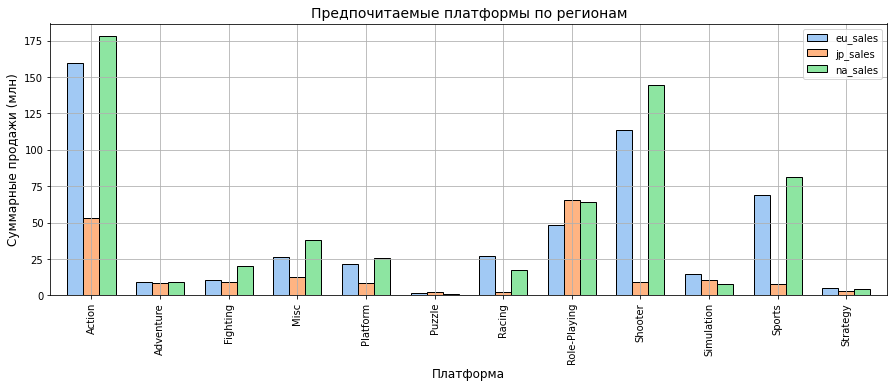

In [44]:
fig,ax = plt.subplots(figsize=(15, 5))
data.query('year_of_release >= 2012').pivot_table(
    index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').plot(
    kind = 'bar', 
    ax = ax, 
    width = 0.7, 
    color = sns.color_palette("pastel"), 
    edgecolor = 'black')
ax.set_ylabel('Суммарные продажи (млн)', fontsize=12)
ax.set_xlabel('Платформа', fontsize=12)
ax.set_title('Предпочитаемые платформы по регионам', fontsize=14)
plt.grid()
plt.show()

В разных регионах, разные предпочтения:  
    - В Северной Америке предпочитают: Платформы от Microsoft X360 и Xone (суммарно 40%), а так же от Sony PS4 и PS3 (суммарно 35%).   
    - В Европе чаще выбирают платформу от Sony PS4 и PS3 (суммарно 49%).   
    - В Японии лидирует Nintendo 3DS, на втором месте PS3. 

**Посмотрим предпочитаемые жанры игр, по каждому региону:**

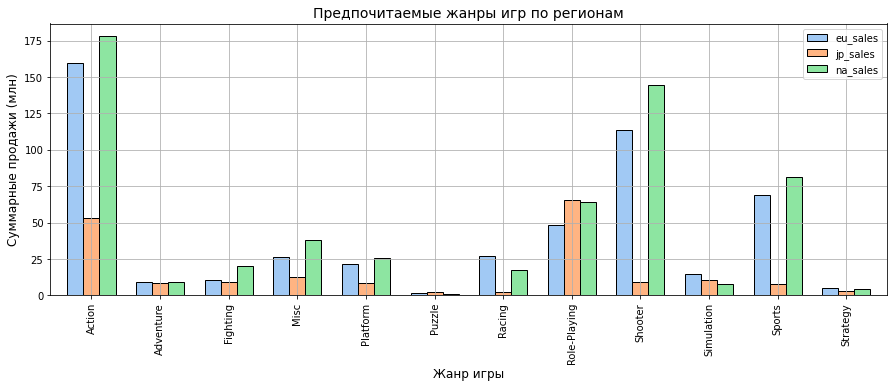

In [45]:
fig,ax = plt.subplots(figsize=(15, 5))
data.query('year_of_release >= 2012').pivot_table(
    index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').plot(
    kind = 'bar', 
    ax = ax, 
    width = 0.7, 
    color = sns.color_palette("pastel"), 
    edgecolor = 'black')
ax.set_ylabel('Суммарные продажи (млн)', fontsize=12)
ax.set_xlabel('Жанр игры', fontsize=12)
ax.set_title('Предпочитаемые жанры игр по регионам', fontsize=14)
plt.grid()
plt.show()

Предпочитаемые жанры по регионам разделены таким образом:  
    - В Северной Америке чаще покупают игры жанра Action и Shooter (суммарно 54%).   
    - В Европе распределение практически как в Америке, лидируют жанры Action и Shooter (суммарно 53%).   
    - В Японии же самым популярным жанром является Role-Playing (34%), на втором месте Action (27%).

**Посмотрим игры с каким рейтингом ESRB больше покупают в каждом регионе:**

In [46]:
data['rating'] = data['rating'].fillna('Без рейтинга')

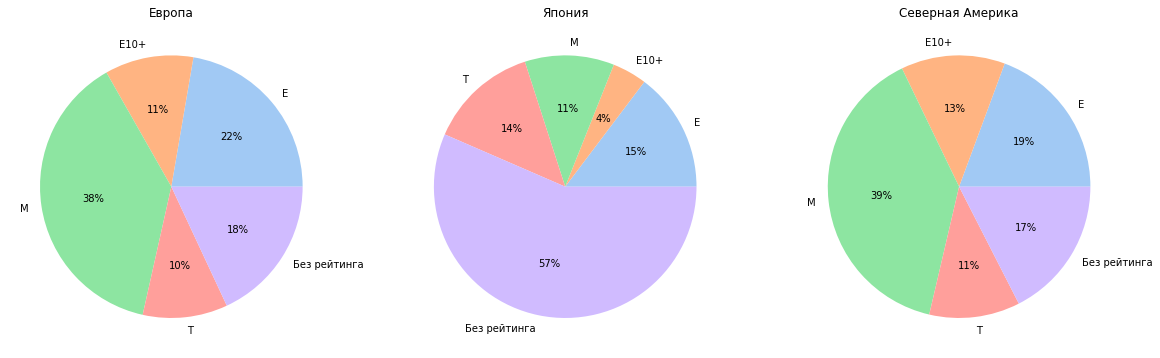

In [47]:
data.query('year_of_release >= 2012').pivot_table(index = 'rating', 
                                                  values = ['na_sales', 'eu_sales', 'jp_sales'], 
                                                  aggfunc = 'sum').plot(
ylabel = '', 
kind = 'pie',
subplots = True, 
figsize = (20, 20),
colors = sns.color_palette("pastel"),
legend = False,
title = ['Европа', 'Япония', 'Северная Америка'],
autopct = '%1.0f%%')
plt.show()

Разбивка по рейтингам ESRB выглядит так:  
    - В Северной Америке и Европе распределение схожее, лидируют по продажам игры с рейтингом **М** ((«Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.).  
    - В Японии, чаще покупают игры без определённого рейтинга (нет оценки от ESRB). Из тех где рейтинг определён, преобладает **E** ((«Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.).

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "><b>Вывод по блоку № 4. 'Портрет пользователя каждого региона' :</b>   

    Составим портрет пользователя по каждому региону:
    - Средне статистический покупатель в Северной Америке предпочитает покупать игры с рейтингом М, в жанрах Action или Shooter и играть на платформе от Microsoft: X360 или XOne.  
    - Средне статистический покупатель в Европе предпочитает покупать игры с рейтингом М, в жанрах Action или Shooter и играть на платформе от Sony: PS4 или PS3.  
    - Средне статистический покупатель в Японии чаще покупает игры без рейтинга от ESRB, в жанрах Role-Playing или Action и играть на платформе от Nintendo 3DS.  
</div>

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Блок № 5. Проверка гипотез </b> </div>

**Проверим гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Сформулируем гипотезы:  
Н0 - Средний пользовательский рейтинг платформ Xbox One и PC одинаковый.  
Н1 - Средний пользовательский рейтинг платформ Xbox One и PC разный. 

In [48]:
alpha = 0.05 

sample_1 = data_5_year.query('platform == "XOne"')['user_score']
sample_2 = data_5_year.query('platform == "PC"')['user_score']

sample_1 = sample_1.dropna()
sample_2 = sample_2.dropna()

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


In [49]:
print(sample_1.mean(), sample_2.mean()) # проверим

6.521428571428572 6.4286407766990274


**Вывод:** Гипотеза подтверждается, средний пользовательский рейтинг платформ Xbox One и PC одинаковый.

**Проверим гипотезу: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Сформулируем гипотезы:    
Н0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Н1 - Средние пользовательские рейтинги жанров Action и Sports разные.    

In [50]:
alpha = 0.05 

sample_3 = data_5_year.query('genre == "Action"')['user_score']
sample_4 = data_5_year.query('genre == "Sports"')['user_score']

sample_3 = sample_3.dropna()
sample_4 = sample_4.dropna()

results = st.ttest_ind(sample_3, sample_4)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.716308946093486e-26
Отвергаем нулевую гипотезу


In [51]:
print(sample_3.mean(), sample_4.mean()) # проверим

6.825047801147227 5.455897435897437


**Вывод:** Нулевая гипотеза не подтвердилась, средние пользовательские рейтинги жанром Action и Sports разные.

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "><b>Вывод по блоку № 5. 'Проверка гипотез' :</b>    

    Проверили две гипотезы и пришли к выводам: 
    - Cредний пользовательский рейтинг платформ Xbox One и PC одинаковый.
    - Cредние пользовательские рейтинги жанров Action и Sports разные.
</div>

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "><b>Итоговый вывод исследования закономерностей определяющих успешность игры :</b>    

    В нашем распоряжении была 1 таблица (data) на 16715 строк и 11 столбцов, c данными об играх и продажах по регионам.
   
    На этапе предобработки данных:
    Были изменены названия столбцов (привели к нижнему регистру).
    В столбцах 'year_of_release' и 'critic_score' изменили тип данных на Int.
    В столбце 'rating' изменили значение 'tbd' на 'nan'.
    Удалены строки с пропусками в наименовании игры, жанре и без данных о годе выпуска.
    Посчитали суммарные продажи и добавили в отдельный столбец 'total_sales'.

    В столбце rating находятся возрастные рейтинги от ассоциации ESRB (Entertainment Software Rating Board), расшифровываются так (информация из википедии):  
    - «EC» («Early childhood») — «Для детей младшего возраста» 
    - «E» («Everyone») — «Для всех». Первоначально "K-A" ("Kids to Adults"):  
    - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».  
    - «T» («Teen») — «Подросткам».  
    - «M» («Mature») — «Для взрослых».  
    - «AO» («Adults Only 18+») — «Только для взрослых».  
    - «RP» («Rating Pending») — «Рейтинг ожидается».  
    - «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+».
    
      Индустрия активно развивалась с 2000 года. После 2008 резкий спад, скорее всего связан с мировым кризисом. Люди стали меньше тратить на развлечения => инвесторы перестали вкладывать в разработку новых игр. Возможно, так же сказалось развитие мобильного гейминга (в 2007 вышел первый iphone, многие платформы типа 'psp' начали терять аудиторию).
      Абсолютно все платформы долго не живут. Стремительно набирают популярность при релизе и так же стремительно начинают терять покупателей (в среднем) через 5 лет. Средняя продолжительность жизни платформы ~ 10 лет. В промежутке 2015 - 2016 год все платформы падают в продажах. Стабильными можно считать платформы от Sony и Microsoft, которые выпускают новое поколение каждые ~7 лет.
      На общем фоне, потенциально прибыльными можно назвать: XOne и PS4. На конец 2016 года, самым правильным решением будет начинать готовиться к выходу 5го поколения PS.  Nintendo 3DS стабильно скатывается, шансов получить положительную динамику - практически нет.
    Так же, можно обратить внимание на PC, результаты по продажам не такие впечатляющие, но стабильные на протяжении многих лет. PS4 и XOne конечно чаще выстреливают кассовыми сборами и как следствие более прибыльные. Возможно сказывается кол-во пиратства на PC, все кассовые игры доступны для этой платформы и распротранена она шире.
      Влияние оценок критиков и пользователей на суммарные продажи по платформе PS4: Из матрицы видно, что оценки критиков слабо влияют на продажи (корреляция 0.41), оценки же пользователей не оказывают влияние (корреляция -0.032).
      Влияние оценок критиков и пользователей на суммарные продажи по платформе ХOne: Картина похожая, как и у PS4, оценки критиков слабо влияют на продажи (корреляция 0.42), оценки же пользователей не оказывают влияние (корреляция -0.069).
      Влияние оценок критиков и пользователей на суммарные продажи по платформе PC: В случае с PC ситуация немного другая, на суммарные продажи практически не влияют ни оценки критиков (корреляция 0.24) ни оценки пользователей (корреляция -0.12).
      Влияние оценок критиков и пользователей на суммарные продажи по платформе 3DS: На суммарные продажи практически не влияют ни оценки критиков (корреляция 0.32) ни оценки пользователей (корреляция 0.2). Интересно, что в Японии оценки пользователей, чаще совпадают с оценками критиков чем в Европе или Северной Америке.
    
      Стабильнее всего приносят деньги игры жанра Shooter, Sports и Role-Playing. Достаточно часто, выстреливают игры жанра Action. Такие жанры как Puzzle и Adventure отличаются стабильно низкими продажами.
    
      Был составлен портрет пользователя каждого региона:
    - Средне статистический покупатель в Северной Америке предпочитает покупать игры с рейтингом М, в жанрах Action или Shooter и играть на платформе от Microsoft: X360 или XOne.  
    - Средне статистический покупатель в Европе предпочитает покупать игры с рейтингом М, в жанрах Action или Shooter и играть на платформе от Sony: PS4 или PS3.  
    - Средне статистический покупатель в Японии чаще покупает игры без рейтинга от ESRB, в жанрах Role-Playing или Action и играть на платформе от Nintendo 3DS.  
    
      Проверили две гипотезы и пришли к выводу: 
    - Средний пользовательский рейтинг платформ Xbox One и PC одинаковый.
    - Средние пользовательские рейтинги жанров Action и Sports разные.
</div>